In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Check Target Variable

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [ ]:
df['stroke'].isna().sum()

0

In [ ]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [ ]:
# extract dataset where age is above 18
c=df['age']>18
df1=df[c]
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df1.shape

(4194, 12)

In [ ]:
len(df1)/len(df)

0.8207436399217222

In [ ]:
df1=df1.rename(columns={'Residence_type':'residence_type'})

In [ ]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df1.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  180
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df1['bmi'].isna().mean()

0.04291845493562232

In [ ]:
df1.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
cols=['age','avg_glucose_level', 'bmi']
df1[cols].describe()

,age,avg_glucose_level,bmi
count,4194.000000,4194.000000,4014.000000
mean,50.662852,108.632995,30.493921
std,17.532031,48.004093,7.222288
min,19.000000,55.120000,11.300000
25%,37.000000,77.420000,25.500000
50%,51.000000,92.360000,29.300000
75%,64.000000,116.225000,34.200000
max,82.000000,271.740000,92.000000


In [ ]:
df1[cols].skew()

age                  0.027804
avg_glucose_level    1.450949
bmi                  1.240993
dtype: float64

In [ ]:
df1[cols].kurtosis()

age                 -1.020418
avg_glucose_level    1.093929
bmi                  3.445238
dtype: float64

In [ ]:
df1['work_type'].value_counts(dropna=False)

Private          2740
Self-employed     804
Govt_job          648
Never_worked        2
Name: work_type, dtype: int64

In [ ]:
df1.groupby(['work_type','stroke']).size()

work_type      stroke
Govt_job       0          615
               1           33
Never_worked   0            2
Private        0         2591
               1          149
Self-employed  0          739
               1           65
dtype: int64

In [ ]:
df1.pivot_table(index='work_type', columns='stroke',aggfunc='size')

stroke,0,1
work_type,,
Govt_job,615.0,33.0
Never_worked,2.0,NaN
Private,2591.0,149.0
Self-employed,739.0,65.0


In [ ]:
pd.crosstab(index=df1['work_type'],columns=df1['stroke'] )

stroke,0,1
work_type,,
Govt_job,615,33
Never_worked,2,0
Private,2591,149
Self-employed,739,65


# Remove outliers

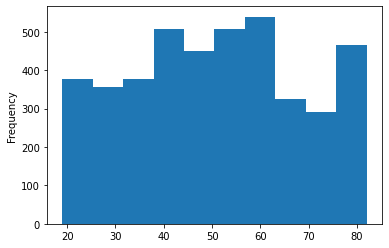

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df1['age'].plot(kind='hist')

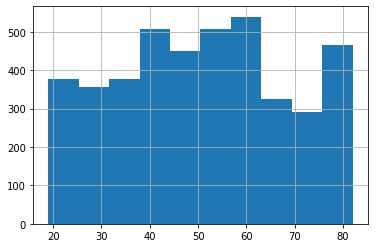

In [ ]:
df1['age'].hist()

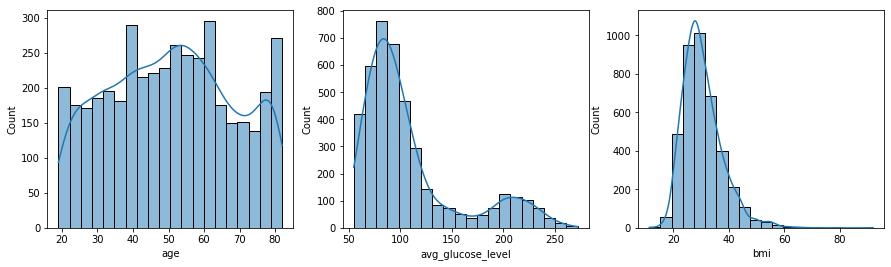

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(ax= axes[0], data=df1, x= 'age', kde=True, bins=20)
sns.histplot(ax= axes[1], data=df1, x= 'avg_glucose_level', kde=True, bins=20)
sns.histplot(ax= axes[2], data=df1, x= 'bmi', kde=True, bins=20)

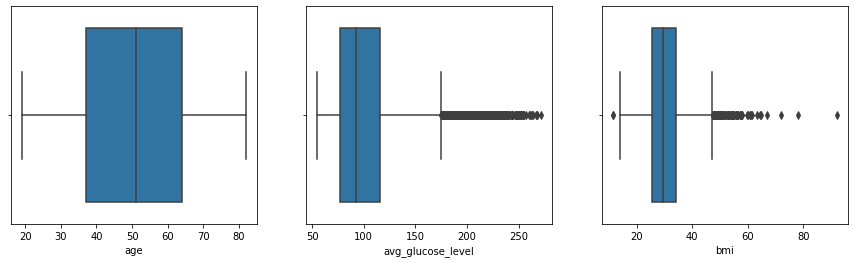

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(ax= axes[0], data=df1, x= 'age')
sns.boxplot(ax= axes[1], data=df1, x= 'avg_glucose_level')
sns.boxplot(ax= axes[2], data=df1, x= 'bmi')

In [ ]:
Q1=df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)
Q3=df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                  27.000
avg_glucose_level    38.805
bmi                   8.700
dtype: float64


In [ ]:
Lower = Q1-3*IQR
Upper = Q3 + 3*IQR
print(Lower)

age                 -44.000
avg_glucose_level   -38.995
bmi                  -0.600
dtype: float64


In [ ]:
print(Upper)

age                  145.00
avg_glucose_level    232.64
bmi                   60.30
dtype: float64


In [ ]:
c1 = df1['avg_glucose_level']<=232.64
c2 = df1['bmi']<=60.3
df2= df1[c1&c2]
df2.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df2.shape

(3915, 12)

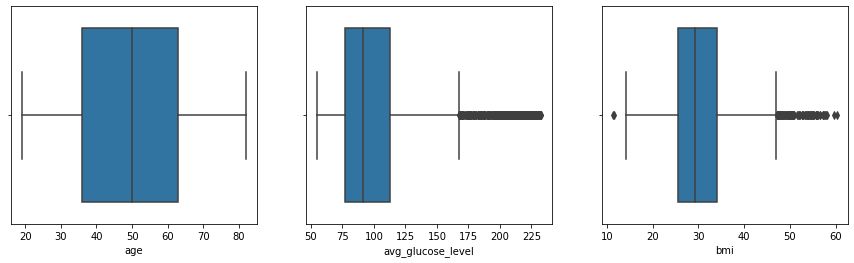

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.boxplot(ax= axes[0], data=df2, x= 'age')
sns.boxplot(ax= axes[1], data=df2, x= 'avg_glucose_level')
sns.boxplot(ax= axes[2], data=df2, x= 'bmi')

In [ ]:
df2.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Correlation Check

In [ ]:
cols = ['age', 'avg_glucose_level', 'bmi']
round(df2[cols].corr(), 2)

,age,avg_glucose_level,bmi
age,1.00,0.20,0.02
avg_glucose_level,0.20,1.00,0.16
bmi,0.02,0.16,1.00


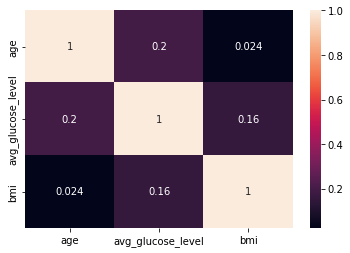

In [ ]:
corr=df2[cols].corr()
sns.heatmap(data=corr, annot=True )

# Additional Plots

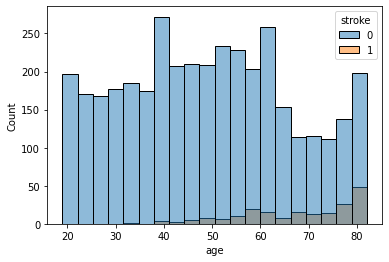

In [ ]:
sns.histplot(data=df2, x='age', hue='stroke', bins=20)

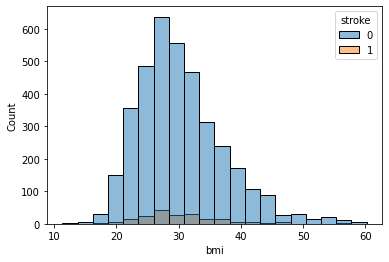

In [ ]:
sns.histplot(data=df2, x='bmi', hue='stroke', bins=20)

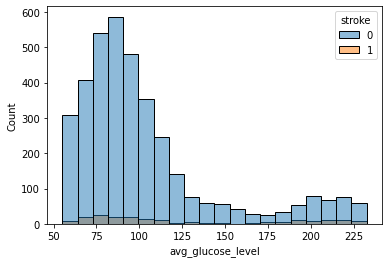

In [ ]:
sns.histplot(data=df2, x='avg_glucose_level', hue='stroke', bins=20)

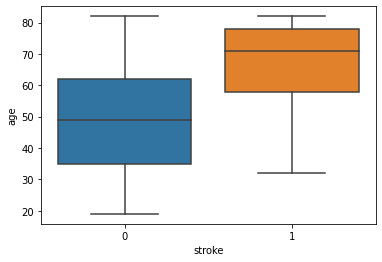

In [ ]:
sns.boxplot(x='stroke', y='age', data=df2)

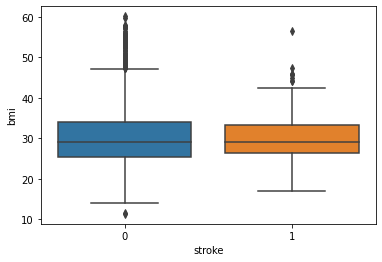

In [ ]:
sns.boxplot(x='stroke', y='bmi', data=df2)

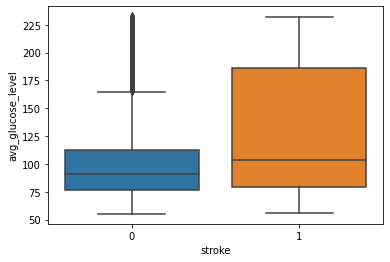

In [ ]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=df2)

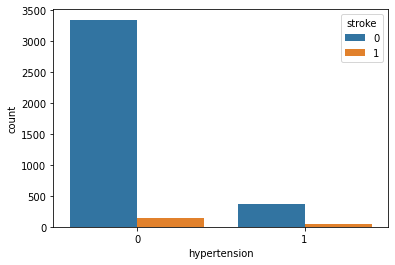

In [ ]:
sns.countplot(x='hypertension', hue='stroke', data=df2)

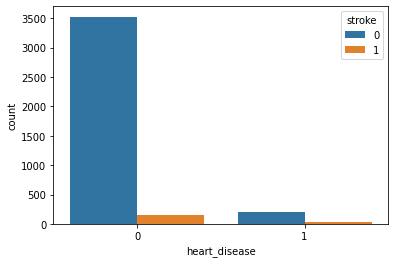

In [ ]:
sns.countplot(x='heart_disease', hue='stroke', data=df2)

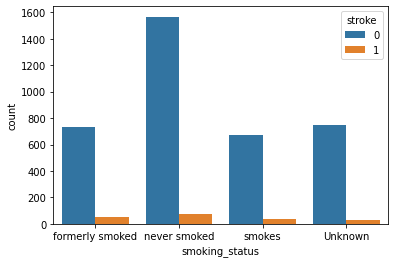

In [ ]:
sns.countplot(x='smoking_status', hue='stroke', data=df2)

In [ ]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/heathcare-dataset-2.csv', index=False)